In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd


from numpy import expand_dims
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image

from tensorflow.keras.applications import VGG16

from tensorflow.keras.utils import to_categorical

import os
import zipfile



In [2]:
train_dir = 'C:/Users/jesus/Desktop/curso IA/cats_and_dogs_small/train'
validation_dir = 'C:/Users/jesus/Desktop/curso IA/cats_and_dogs_small/validation'
test_dir = 'C:/Users/jesus/Desktop/curso IA/cats_and_dogs_small/test'

In [3]:
train_cats_dir = 'C:/Users/jesus/Desktop/curso IA/cats_and_dogs_small/train/cats'
train_dogs_dir = 'C:/Users/jesus/Desktop/curso IA/cats_and_dogs_small/train/dogs'

In [4]:
validation_cats_dir = 'C:/Users/jesus/Desktop/curso IA/cats_and_dogs_small/validation/cats'
validation_dogs_dir = 'C:/Users/jesus/Desktop/curso IA/cats_and_dogs_small/validation/dogs'

In [5]:
test_cats_dir = 'C:/Users/jesus/Desktop/curso IA/cats_and_dogs_small/test/cats'
test_dogs_dir = 'C:/Users/jesus/Desktop/curso IA/cats_and_dogs_small/test/dogs'

In [6]:
train_cat_fnames = os.listdir( train_cats_dir )

In [7]:
train_dog_fnames = os.listdir( train_dogs_dir )

In [8]:
validation_cats_dir = os.listdir( validation_cats_dir )
validation_dogs_dir = os.listdir( validation_dogs_dir )

In [9]:
test_cats_dir = os.listdir( test_cats_dir )
test_dogs_dir = os.listdir( test_dogs_dir )

In [10]:
train_datagen = ImageDataGenerator( rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

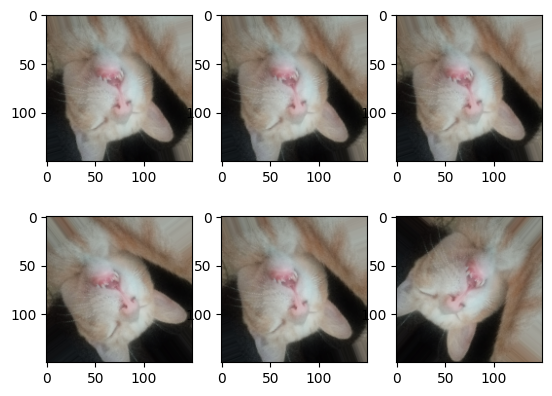

In [11]:
for i in range(6):
    path =  'C:/Users/jesus/Desktop/curso IA/testgato/bob.jpg'
    img = load_img(  path, target_size=(150,150) )
    data = img_to_array(img)
    samples = expand_dims(data, 0)
    datagen = ImageDataGenerator( rotation_range=45 )
    
    it = datagen.flow( samples, batch_size=1 )
    for i in range(6):
        plt.subplot( 230 + 1 + i )
        batch = it.__next__()
        image =  batch[0].astype('uint8')
        plt.imshow(image);

In [12]:
validation_datagen = ImageDataGenerator(  rescale=1.0/255 )

In [13]:
test_datagen = ImageDataGenerator(  rescale=1.0/255 )

In [14]:
train_generator = train_datagen.flow_from_directory( train_dir, batch_size=20, class_mode='binary', target_size=(150,150) )

Found 2000 images belonging to 2 classes.


In [15]:
validation_generator = validation_datagen.flow_from_directory( validation_dir, batch_size=20, class_mode='binary', target_size=(150,150) )

Found 1000 images belonging to 2 classes.


In [16]:
test_generator = test_datagen.flow_from_directory( test_dir, batch_size=20, class_mode='binary', target_size=(150,150) )

Found 1000 images belonging to 2 classes.


In [17]:
modelDA = Sequential()

In [18]:
modelDA.add( Conv2D( 32, (3,3), activation='relu', input_shape=(150,150, 3) ) )
modelDA.add( MaxPooling2D(2,2) )

modelDA.add( Conv2D( 64, (3,3), activation='relu' ) )
modelDA.add( MaxPooling2D(2,2) )

modelDA.add( Conv2D( 128, (3,3), activation='relu' ) )
modelDA.add( MaxPooling2D( (2,2) ))

modelDA.add( Conv2D( 128, (3,3), activation='relu' ) )
modelDA.add( MaxPooling2D(2,2) )

modelDA.add( Flatten() )

modelDA.add( Dense(512, activation='relu' ) )
modelDA.add( Dense(1, activation='sigmoid' ) )

C:\Users\jesus\anaconda3\envs\curso_IA\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
modelDA.compile( optimizer=RMSprop( learning_rate=1e-4 ), loss='binary_crossentropy', metrics= ['acc'] )

In [20]:
batch_size = 100
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

In [ ]:
history = modelDA.fit( train_generator, 
                     steps_per_epoch=steps_per_epoch, 
                     epochs=100, 
                     validation_data=validation_generator,
                     validation_steps=validation_steps,
                     verbose=2)

Epoch 1/100


C:\Users\jesus\anaconda3\envs\curso_IA\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 - 5s - 252ms/step - acc: 0.4775 - loss: 0.7060 - val_acc: 0.5650 - val_loss: 0.6880
Epoch 2/100


In [ ]:
history_dict = history.history
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

In [ ]:
epochs = range( 1, len(acc)+1, 1 )

In [ ]:
plt.plot(epochs, acc, 'r--', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title( 'Training and Validation accuracy' )
plt.ylabel('acc')
plt.ylabel('epochs')

plt.legend()
plt.figure()

C:\Users\jesus\AppData\Local\Temp\ipykernel_14728\4182627787.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<Figure size 640x480 with 0 Axes>

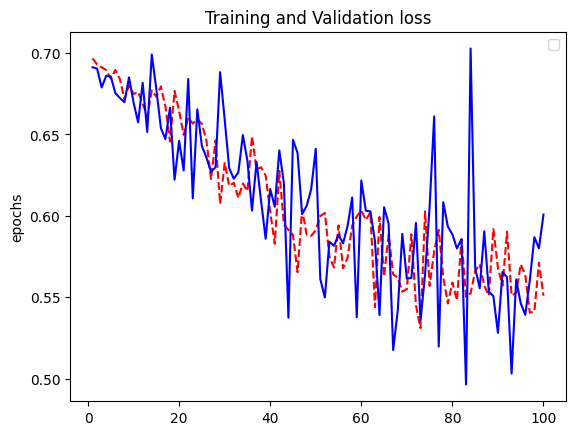

<Figure size 640x480 with 0 Axes>

In [84]:
plt.plot(epochs, loss, 'r--')
plt.plot(epochs, val_loss, 'b') 
plt.title( 'Training and Validation loss' )
plt.ylabel('acc')
plt.ylabel('epochs')

plt.legend()
plt.figure()

In [86]:
test_lost, test_acc = modelDA.evaluate(test_generator)
test_lost

50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - acc: 0.7070 - loss: 0.5722


0.573762059211731

In [87]:
test_acc

0.7089999914169312

In [90]:
pre_trained_model = VGG16( input_shape=( 150, 150, 3 ), include_top=False, weights='imagenet' )

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [91]:
pre_trained_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [92]:
for layer in pre_trained_model.layers:
    layer.trainable = False

In [96]:
modelFE = Sequential()

In [97]:

modelFE.add( pre_trained_model )
modelFE.add( Flatten() )

modelFE.add( Dense(256, activation='relu' ) )
modelFE.add( Dense(1, activation='sigmoid' ) )

In [98]:
modelFE.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [99]:
modelFE.compile( optimizer=RMSprop( learning_rate=1e-4 ), loss='binary_crossentropy', metrics= ['acc'] )

In [100]:
history = modelFE.fit( train_generator, 
                     steps_per_epoch=steps_per_epoch, 
                     epochs=100, 
                     validation_data=validation_generator,
                     validation_steps=validation_steps,
                     verbose=2)

Epoch 1/100
20/20 - 13s - 649ms/step - acc: 0.5975 - loss: 0.7046 - val_acc: 0.8350 - val_loss: 0.4598
Epoch 2/100
20/20 - 12s - 611ms/step - acc: 0.7350 - loss: 0.5304 - val_acc: 0.8500 - val_loss: 0.3547
Epoch 3/100
20/20 - 12s - 612ms/step - acc: 0.7925 - loss: 0.4659 - val_acc: 0.7650 - val_loss: 0.4395
Epoch 4/100
20/20 - 12s - 610ms/step - acc: 0.8025 - loss: 0.4304 - val_acc: 0.8350 - val_loss: 0.3690
Epoch 5/100
20/20 - 12s - 611ms/step - acc: 0.7825 - loss: 0.4233 - val_acc: 0.8150 - val_loss: 0.3966
Epoch 6/100
20/20 - 12s - 593ms/step - acc: 0.7800 - loss: 0.4756 - val_acc: 0.8500 - val_loss: 0.3432
Epoch 7/100
20/20 - 12s - 588ms/step - acc: 0.8200 - loss: 0.4014 - val_acc: 0.8600 - val_loss: 0.3293
Epoch 8/100
20/20 - 12s - 597ms/step - acc: 0.8025 - loss: 0.4163 - val_acc: 0.8800 - val_loss: 0.2963
Epoch 9/100
20/20 - 12s - 594ms/step - acc: 0.7725 - loss: 0.4334 - val_acc: 0.8150 - val_loss: 0.4021
Epoch 10/100
20/20 - 12s - 583ms/step - acc: 0.8125 - loss: 0.3921 - val_

In [101]:
history_dict = history.history
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

In [102]:
epochs = range( 1, len(acc)+1, 1 )

<Figure size 640x480 with 0 Axes>

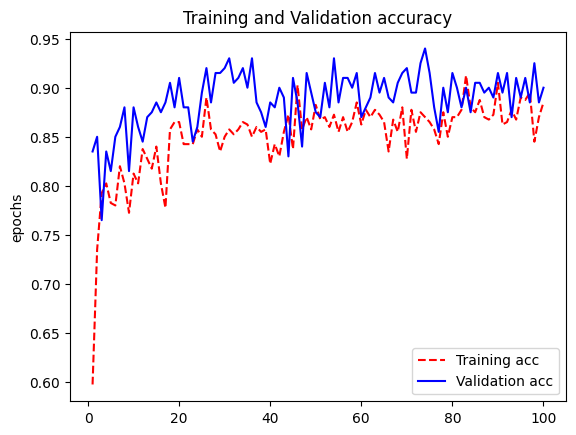

<Figure size 640x480 with 0 Axes>

In [103]:
plt.plot(epochs, acc, 'r--', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title( 'Training and Validation accuracy' )
plt.ylabel('acc')
plt.ylabel('epochs')

plt.legend()
plt.figure()

C:\Users\jesus\AppData\Local\Temp\ipykernel_14728\4182627787.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<Figure size 640x480 with 0 Axes>

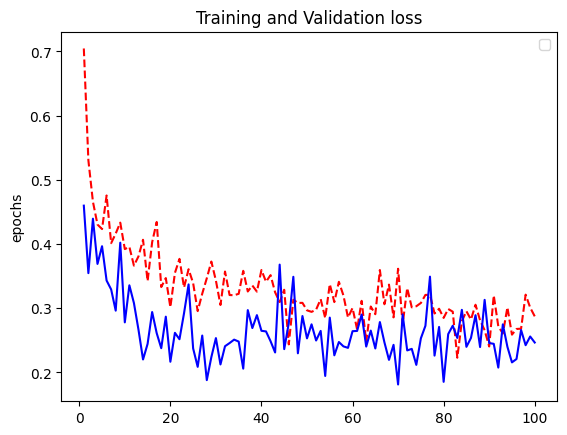

<Figure size 640x480 with 0 Axes>

In [104]:
plt.plot(epochs, loss, 'r--')
plt.plot(epochs, val_loss, 'b') 
plt.title( 'Training and Validation loss' )
plt.ylabel('acc')
plt.ylabel('epochs')

plt.legend()
plt.figure()

In [105]:
test_lost, test_acc = modelFE.evaluate(test_generator)
test_lost

50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 381ms/step - acc: 0.8981 - loss: 0.2354


0.2470856010913849

In [106]:
test_acc

0.9010000228881836

In [108]:
new_pre_trained_model = VGG16( input_shape=( 150, 150, 3 ), include_top=False, weights='imagenet' )

In [109]:
new_pre_trained_model.trainable = True

In [110]:
set_trainable = True

In [112]:
for layer in new_pre_trained_model.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
        if set_trainable:
            layer.trainable = True
        else:
            layer.trainable = False

In [113]:
modelFT = Sequential()

modelFT.add( new_pre_trained_model )
modelFT.add( Flatten() )

modelFT.add( Dense(256, activation='relu' ) )
modelFT.add( Dense(1, activation='sigmoid' ) )

In [114]:
modelFT.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 16,812,353 (64.13 MB)

 Non-trainable params: 0 (0.00 B)

In [115]:
modelFT.compile( optimizer=RMSprop( learning_rate=1e-4 ), loss='binary_crossentropy', metrics= ['acc'] )

In [116]:
history = modelFE.fit( train_generator, 
                     steps_per_epoch=steps_per_epoch, 
                     epochs=100, 
                     validation_data=validation_generator,
                     validation_steps=validation_steps,
                     verbose=2)

Epoch 1/100
20/20 - 13s - 628ms/step - acc: 0.8650 - loss: 0.2890 - val_acc: 0.9200 - val_loss: 0.2479
Epoch 2/100
20/20 - 12s - 612ms/step - acc: 0.8700 - loss: 0.2714 - val_acc: 0.9100 - val_loss: 0.2292
Epoch 3/100
20/20 - 13s - 625ms/step - acc: 0.8800 - loss: 0.2530 - val_acc: 0.8900 - val_loss: 0.2574
Epoch 4/100
20/20 - 12s - 616ms/step - acc: 0.8675 - loss: 0.2692 - val_acc: 0.8900 - val_loss: 0.2521
Epoch 5/100
20/20 - 12s - 623ms/step - acc: 0.8525 - loss: 0.3274 - val_acc: 0.9050 - val_loss: 0.1989
Epoch 6/100
20/20 - 12s - 588ms/step - acc: 0.8775 - loss: 0.3088 - val_acc: 0.8800 - val_loss: 0.2475
Epoch 7/100
20/20 - 12s - 593ms/step - acc: 0.8675 - loss: 0.2748 - val_acc: 0.9000 - val_loss: 0.1968
Epoch 8/100
20/20 - 12s - 600ms/step - acc: 0.8675 - loss: 0.2723 - val_acc: 0.8800 - val_loss: 0.2754
Epoch 9/100
20/20 - 12s - 595ms/step - acc: 0.8950 - loss: 0.2803 - val_acc: 0.8750 - val_loss: 0.3091
Epoch 10/100
20/20 - 12s - 579ms/step - acc: 0.8825 - loss: 0.2578 - val_

In [118]:
history_dictFE = history.history
accFE = history_dictFE['acc']
val_accFE = history_dictFE['val_acc']
lossFE = history_dictFE['loss']
val_lossFE = history_dictFE['val_loss']

In [119]:
epochs = range( 1, len(acc)+1, 1 )

<Figure size 640x480 with 0 Axes>

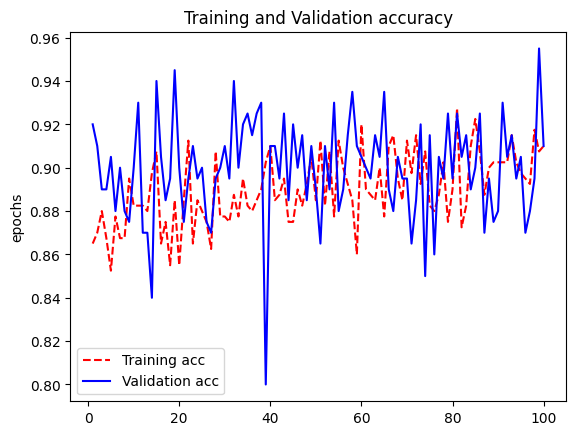

<Figure size 640x480 with 0 Axes>

In [120]:
plt.plot(epochs, accFE, 'r--', label='Training acc')
plt.plot(epochs, val_accFE, 'b', label='Validation acc') 
plt.title( 'Training and Validation accuracy' )
plt.ylabel('acc')
plt.ylabel('epochs')

plt.legend()
plt.figure()

C:\Users\jesus\AppData\Local\Temp\ipykernel_14728\3010254516.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<Figure size 640x480 with 0 Axes>

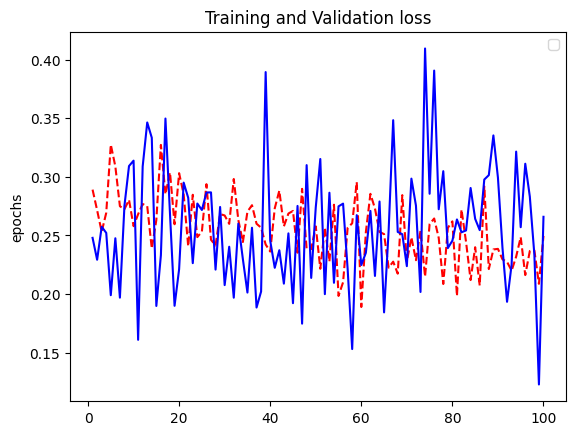

<Figure size 640x480 with 0 Axes>

In [121]:
plt.plot(epochs, lossFE, 'r--')
plt.plot(epochs, val_lossFE, 'b') 
plt.title( 'Training and Validation loss' )
plt.ylabel('acc')
plt.ylabel('epochs')

plt.legend()
plt.figure()

In [122]:
test_lost, test_acc = modelFE.evaluate(test_generator)
test_lost

50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 386ms/step - acc: 0.9195 - loss: 0.2016


0.2412571907043457

In [123]:
test_acc

0.906000018119812